### Kaggle dataset: https://www.kaggle.com/lava18/google-play-store-apps

In [77]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [79]:
import pandas as pd
import numpy as np
import math

In [80]:
df = pd.read_csv("googleplaystore.csv", error_bad_lines=False)

In [81]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [82]:
## Reviews / Size / Installs / Price -> numeric

In [83]:
## Category / Type / Content Rating / Genres ->category

In [84]:
## App / Last Updated / Current Ver / Android Ver 

In [85]:
######### Reviews

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [87]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [88]:
df.fillna(0, inplace=True)

In [89]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [90]:
reviews_column=[]
for i,j in (df["Reviews"].items()):
    if(j.endswith("M")):
        reviews_column.append(j[:-1])
        continue
    reviews_column.append(j)

In [91]:
df["Reviews"]=reviews_column

In [92]:
size_column=[]
for i,j in (df["Size"].items()):
    if(j=="Varies with device"):
        x="0"
        size_column.append(x)
        continue
    print(j.split("M")[0])
    x=j.split("M")[0]
    if(x.endswith("k")):
        size_column.append(x[:-1])
        continue
    if(x.endswith("1,000+")):
        size_column.append("1000")
        continue
    size_column.append(x)
    

19
14
8.7
25
2.8
5.6
19
29
33
3.1
28
12
20
21
37
2.7
5.5
17
39
31
14
12
4.2
7.0
23
6.0
25
6.1
4.6
4.2
9.2
5.2
11
11
4.2
9.2
24
11
9.4
15
10
1.2
12
24
26
8.0
7.9
25
56
57
35
33
33
5.6
54
201k
3.6
5.7
17
8.6
2.4
27
2.7
2.5
7.0
35
16
16
17
3.4
8.9
3.9
2.9
38
32
37
15
5.4
18
38
1.1
7.9
35
17
19
14
2.2
4.5
17
14
9.8
21
52
14
25
9.0
12
35
6.7
30
5.7
2.9
17
2.9
2.6
4.2
7.1
57
3.7
22
24
7.4
21
3.4
2.9
3.1
6.4
3.2
8.2
9.9
2.9
23
4.6
3.1
4.9
9.5
4.2
5.4
2.8
5.0
5.9
13
7.1
6.7
17
19
6.7
21
2.7
37
15
23
19
23
73
4.9
6.8
2.9
3.5
4.0
21
2.3
7.2
10
6.1
2.1
42
7.3
30
29
35
9.1
25
3.9
18
12
21
55
3.2
23k
16
14
37
11
25
7.3
6.5
25
3.1
1.5
7.5
8.6
1.2
39
14
19
6.8
39
14
20
26
51
41
20
12
48
10
22
11
8.5
8.6
28
28
37
9.0
46
14
26
23
14
20
26
51
41
20
12
48
10
22
11
8.5
8.6
28
39
14
19
6.8
39
35
29
41
4.9
27
32
12
15
11
28
2.2
3.4
8.3
4.3
4.7
10
15
7.1
21
6.1
15
11
29
3.3
22
40
10
9.1
4.7
38
6.7
37
7.8
19
5.7
35
17
8.8
16
11
11
15
6.6
6.6
5.1
18
4.0
37
22
3.3
32
37
17
35
40
61
66
11
79k
25
14
24
17
8.3
8.2

11
3.2
3.7
1.2
8.4
31
9.6
45
56
26
17
6.9
99
47
36
21
3.0
8.5
2.0
15
50
17
1.9
70
41
99
96
16
84
5.0
5.0
99
99
26
37
9.0
88
87
78
67
59
1.4
59
47
76
62
80
3.8
56
72
25
79
98
68
91
44
96
61
19
8.8
96
7.7
10
2.2
16
5.7
29
24
4.3
48
2.3
13
7.6
99
22
12
88
91
99
10
57
18
33
8.2
46
63
239k
48
48
18
8.3
54
30
8.3
23
11
8.4
82
5.0
17
37
45
40
7.0
3.8
22
15
8.5
371k
5.2
13
92
2.0
5.0
1.8
1.7
24
23
5.1
7.9
7.8
4.2
18
3.3
7.7
3.1
27
220k
26
3.0
28
11
6.1
26
5.0
2.1
6.1
2.2
14
2.3
28
3.0
9.7
3.4
3.9
9.4
26
27
4.4
26
3.2
7.0
1.4
1.7
1.5
39
6.1
4.3
8.3
730k
2.1
26
756k
3.2
4.1
20
3.6
44
26
17
1.1
2.9
24
14
6.9
12
91k
9.4
1.7
293k
35
3.8
17k
74k
20
1.1
4.1
13
14k
8.3
9.0
9.0
3.3
28
19
59
1.9
12
1.8
30
18
29
26
12
12
17
18
26
17
12
317k
7.5
66
30
35
26
15
27
39
9.1
13
35
5.1
6.7
37
3.9
4.0
7.6
6.6
32
2.9
78k
1.2
15
18
15
19
4.1
5.6
3.5
6.4
3.0
924k
11
4.9
6.1
902k
53
1.3
4.7
3.1
11
3.7
266k
19
2.0
4.1
3.4
13
46
3.9
11
3.5
11
17
17
11
64
10
35
12
2.4
3.7
6.3
22
10.0
3.7
4.6
44
18
9.7
2.7
51
47
56
24
5

32
288k
4.2
17
18
37
15
3.8
21
4.2
28
2.3
775k
10
5.9
33
7.5
19
3.8
4.0
62
7.6
27
2.1
15
3.4
30
18
5.3
31
50
22
2.6
86
71
32
9.2
16
4.2
3.5
60
5.9
78
12
4.9
3.0
6.3
8.4
4.0
1.9
201k
5.0
4.0
30
9.0
8.5
13
3.4
20
4.4
8.3
19
6.4
2.4
5.3
5.2
70
41
1.9
39
5.8
11
6.9
15
4.7
8.2
18
4.4
15
9.4
3.0
12
3.4
5.1
2.0
3.2
5.2
11
14
7.7
12
3.8
8.1
5.4
5.7
10
8.7
3.8
5.6
3.8
4.1
11
5.7
3.8
9.1
2.5
6.7
11
7.7
7.0
43
13
20
59
3.9
27
16
63
12
30
44
43
17
42
6.3
2.6
20
16
13
6.3
2.7
56
1.1
26
56
785k
25
4.7
6.0
4.9
18
66
41
96
76
4.2
36
3.9
24
35
23
13
19
7.6
96
35
81
95
10
21
4.7
27
25
3.4
33
5.7
3.1
4.3
4.5
46
33
58
9.3
6.2
6.7
41
6.0
9.5
60
31
36
4.3
1.5
68
1.2
12
22
45
62
80
34
3.5
67
58
5.1
5.5
12
19
19
8.8
11
12
32
22
38
60
35
15
43
4.4
2.1
23
2.3
636k
4.2
4.6
7.9
1.4
21
916k
28
1.6
84
6.6
12
14
38
5.0
2.9
1.4
8.4
3.0
2.6
3.7
100
5.8
28
4.5
8.9
3.1
22
9.9
49
1.6
8.9
22
23
94
6.3
1.1
95
21
9.5
24
1.5
24
7.9
5.3
1.2
12
5.7
13
24
54
3.9
51
49
1.3
994k
3.6
4.1
66
32
2.9
8.9
47
2.1
12
7.8
15
25
14
10
8.9

In [93]:
size=[]
for i in x:
    if i==0:
        size.append(ort)
        continue
    size.append(i)
        
        

In [94]:
df["Size"]=size_column

In [95]:
df["Size"]

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839      0
10840     19
Name: Size, Length: 10841, dtype: object

In [96]:
##### Installs

In [97]:
df["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [98]:
from decimal import Decimal

In [99]:
installs_column=[]
for i,j in (df["Installs"].items()):
    if(j=="Free"):
        installs_column.append("0")
        continue
    print(j[:-1])
    install_str=j[:-1].replace(",","")
    print(install_str)
    installs_column.append(install_str)

10,000
10000
500,000
500000
5,000,000
5000000
50,000,000
50000000
100,000
100000
50,000
50000
50,000
50000
1,000,000
1000000
1,000,000
1000000
10,000
10000
1,000,000
1000000
1,000,000
1000000
10,000,000
10000000
100,000
100000
100,000
100000
5,000
5000
500,000
500000
10,000
10000
5,000,000
5000000
10,000,000
10000000
100,000
100000
100,000
100000
500,000
500000
100,000
100000
50,000
50000
10,000
10000
500,000
500000
100,000
100000
10,000
10000
100,000
100000
100,000
100000
50,000
50000
100,000
100000
100,000
100000
10,000
10000
100,000
100000
500,000
500000
5,000,000
5000000
10,000
10000
500,000
500000
10,000
10000
100,000
100000
10,000,000
10000000
100,000
100000
10,000
10000
10,000,000
10000000
100,000
100000
100,000
100000
100,000
100000
100,000
100000
1,000,000
1000000
100,000
100000
1,000,000
1000000
100,000
100000
100,000
100000
100,000
100000
50,000
50000
100,000
100000
100,000
100000
100,000
100000
10,000
10000
100,000
100000
1,000,000
1000000
100,000
100000
100,000
100000
10,0

10000000
50,000,000
50000000
100,000,000
100000000
50,000,000
50000000
10,000,000
10000000
10,000,000
10000000
10,000,000
10000000
100,000,000
100000000
100,000,000
100000000
10,000,000
10000000
100,000,000
100000000
100,000,000
100000000
100,000,000
100000000
1,000,000,000
1000000000
100,000,000
100000000
500,000,000
500000000
100,000,000
100000000
100,000,000
100000000
500,000,000
500000000
100,000,000
100000000
100,000,000
100000000
10,000,000
10000000
100,000,000
100000000
100,000,000
100000000
10,000,000
10000000
50,000,000
50000000
10,000,000
10000000
10,000,000
10000000
10,000,000
10000000
100,000,000
100000000
10,000,000
10000000
100,000,000
100000000
5,000,000
5000000
50,000,000
50000000
100,000,000
100000000
500,000,000
500000000
100,000,000
100000000
50,000,000
50000000
10,000,000
10000000
100,000,000
100000000
10,000,000
10000000
1,000,000
1000000
500,000,000
500000000
100,000,000
100000000
5,000,000
5000000
10,000,000
10000000
100,000,000
100000000
1,000,000
1000000
100,00

10000000
10,000,000
10000000
1,000,000
1000000
10,000,000
10000000
10,000
10000
100,000
100000
10,000,000
10000000
10,000,000
10000000
10,000,000
10000000
100,000,000
100000000
1,000,000
1000000
10,000,000
10000000
1,000,000
1000000
500,000,000
500000000
10,000,000
10000000
100,000,000
100000000
10,000,000
10000000
1,000,000,000
1000000000
10,000,000
10000000
10,000,000
10000000
100,000,000
100000000
10,000,000
10000000
100,000,000
100000000
5,000,000
5000000
1,000,000
1000000
10,000,000
10000000
100,000,000
100000000
50,000,000
50000000
100,000,000
100000000
10,000,000
10000000
100,000,000
100000000
5,000,000
5000000
100,000,000
100000000
10,000,000
10000000
10,000,000
10000000
1,000,000
1000000
500,000,000
500000000
10,000,000
10000000
10,000,000
10000000
500,000,000
500000000
100,000,000
100000000
10,000,000
10000000
5,000,000
5000000
5,000,000
5000000
5,000,000
5000000
100,000,000
100000000
10,000,000
10000000
50,000,000
50000000
10,000,000
10000000
100,000,000
100000000
5,000,000


100,000
100000
10,000
10000
50,000
50000
50,000
50000
1,000,000
1000000
10,000
10000
1,000,000
1000000
10,000
10000
5,000
5000
100
100
1,000
1000
1,000
1000
100
100
1,000
1000
100,000
100000
100,000
100000
500
500
1,000,000
1000000
1,000
1000
100,000
100000
5,000
5000
10,000
10000
5,000,000
5000000
10,000,000
10000000
100
100
100,000
100000
100
100
100
100
1,000
1000
5,000
5000
100
100
500
500
1,000
1000
10,000
10000
500
500
10,000
10000
5,000,000
5000000
50,000
50000
50,000
50000
100,000
100000
10,000
10000
1,000,000
1000000
1,000
1000
100
100
10
10
100
100
1,000,000
1000000
10
10
500
500
10,000
10000
100
100
500
500
500
500
10
10
1,000
1000
1,000
1000
100
100
100
100
10
10
10
10
10
10
10,000
10000
100
100
100
100
100
100
100
100
50
50
5,000
5000
100
100
5
5
50
50
1,000
1000
50
50
10
10
100,000
100000
5
5
50
50
5
5
10
10
10
10
500,000
500000
10
10
10
10
100
100
500
500
100,000
100000
100,000
100000
100
100
500,000
500000
50,000
50000
1,000
1000
10,000
10000
1,000
1000
5,000
5000
100
1

10,000,000
10000000
1,000,000
1000000
1,000,000
1000000
100,000
100000
50,000,000
50000000
5,000,000
5000000
1,000,000
1000000
100,000
100000
500,000
500000
100,000
100000
100,000
100000
500,000
500000
1,000,000
1000000
1,000,000
1000000
100,000
100000
100,000
100000
500,000
500000
500,000
500000
5,000,000
5000000
50,000
50000
500,000
500000
100,000
100000
5,000,000
5000000
100,000
100000
1,000,000
1000000
100,000
100000
100,000
100000
1,000,000
1000000
500,000
500000
100,000
100000
100,000
100000
1,000,000
1000000
1,000,000
1000000
1,000,000
1000000
1,000,000
1000000
10,000
10000
100
100
100,000
100000
1,000
1000
100
100
100
100
1,000
1000
10,000
10000
1,000
1000
1,000
1000
10
10
50,000
50000
50
50
10
10
1,000
1000
10
10
100,000
100000
500
500
10,000
10000
1,000
1000
5,000
5000
1,000,000
1000000
500
500
1,000
1000
100
100
1,000
1000
1,000
1000
5,000
5000
50,000
50000
500
500
1,000
1000
10,000
10000
100
100
500,000
500000
100
100
1,000
1000
1,000
1000
5,000
5000
1,000
1000
50
50
500
50

10000
10,000
10000
1,000
1000
1,000
1000
10,000
10000
50
50
1,000
1000
50,000
50000
10,000
10000
1,000,000
1000000
100,000
100000
100
100
5,000
5000
50,000
50000
10,000
10000
100
100
50,000
50000
10,000
10000
1,000
1000
100
100
100,000
100000
1,000
1000
1,000
1000
100
100
1,000
1000
10,000
10000
5,000
5000
500,000
500000
100,000
100000
50
50
100
100
100
100
500
500
10
10
10,000
10000
5,000
5000
1,000
1000
1,000
1000
100,000
100000
100,000
100000
100,000
100000
1,000,000
1000000
100,000
100000
10,000
10000
10,000
10000
10,000
10000
100,000
100000
1,000
1000
1,000,000
1000000
10,000
10000
50,000
50000
100
100
10
10
5,000
5000
1,000
1000
10,000
10000
1,000
1000
1,000
1000
1,000
1000
500,000
500000
10,000
10000
1,000
1000
500
500
1,000
1000
10,000
10000
100
100
100
100
1,000
1000
10
10
5,000
5000
100,000
100000
10,000
10000
100
100
1,000
1000
100
100
1,000
1000
100
100
10,000
10000
10
10
10
10
500
500
5,000
5000
10,000
10000
100
100
500
500
10
10
500,000
500000
500,000
500000
10,000
10000


In [100]:
installs=pd.to_numeric(installs_column)

In [101]:
df["Installs"]=installs_column

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [103]:
#### Price

In [104]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [105]:
price_column=[]
for i,j in (df["Price"].items()):
    if(j.startswith("$")):
        price_column.append(j[1:])
        continue
    if(j=="Everyone"):
        price_column.append("0")
        continue
    if(j==0):
        price_column.append("0")
    price_column.append(j)


In [106]:
x=pd.to_numeric(price_column)

In [107]:
df["Price"]=price_column

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
df_copy=df.copy()

In [110]:
df.drop(["Last Updated"],axis=1,inplace = True)

In [111]:
df.drop(["Current Ver"],axis=1,inplace = True)

In [112]:
df.drop(["Android Ver"],axis=1,inplace = True)

In [113]:
df.drop(["App"],axis=1,inplace = True)

In [114]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [115]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [116]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [117]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', 0], dtype=object)

In [118]:
df["Size"].index

RangeIndex(start=0, stop=10841, step=1)

In [119]:
############

In [120]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [121]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [122]:
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)

In [123]:
train_cats(df)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        10841 non-null  category
 1   Rating          10841 non-null  float64 
 2   Reviews         10841 non-null  category
 3   Size            10841 non-null  category
 4   Installs        10841 non-null  category
 5   Type            10841 non-null  category
 6   Price           10841 non-null  category
 7   Content Rating  10841 non-null  category
 8   Genres          10841 non-null  category
dtypes: category(8), float64(1)
memory usage: 432.9 KB


In [125]:
# reordering categories, inplace will change existing df
df["Content Rating"].cat.set_categories(["Unrated", "Mature 17+", "Adults only 18+,","Teen","Eveyone 10+","Everyone"], ordered = True, inplace = True)

In [126]:
df["Content Rating"].cat.categories

Index(['Unrated', 'Mature 17+', 'Adults only 18+,', 'Teen', 'Eveyone 10+',
       'Everyone'],
      dtype='object')

In [127]:
# reordering categories, inplace will change existing df
df["Type"].cat.set_categories(["Paid","0","Free"], ordered = True, inplace = True)

In [128]:
df["Type"].cat.categories

Index(['Paid', '0', 'Free'], dtype='object')

In [129]:
finally_df_copy=df.copy

In [130]:
# Missing of the entry can also be a valuable information
# So we will create a column that is False when value is missing
# We encoded missingness in categorical columns so we will just create _na columns for numerical types
def fix_missing(df, col, name):
      
    if is_numeric_dtype(col):
        print(col," fix missing uygulandı")
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [131]:
# We will have codes starting from 0 (for missing)
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        print(col," numericalize uygulandı")
        df[name] = col.cat.codes+1
    if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)

In [132]:
def proc_df(df, y_fld):
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
    res = [df, y]
    

    
    return res

In [133]:
df_compare, y = proc_df(df, 'Rating')

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: category
Categories (34, object): ['1.9' < 'ART_AND_DESIGN' < 'AUTO_AND_VEHICLES' < 'BEAUTY' ... 'TOOLS' < 'TRAVEL_AND_LOCAL' < 'VIDEO_PLAYERS' < 'WEATHER']  numericalize uygulandı
0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: category
Categories (6002, object): ['0' < '1' < '10' < '100' ... '9971' < '9975' < '999' < '9992']  numericalize uygulandı
0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839   

In [134]:
#####################################################################3

In [135]:
df_compare.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_na,Reviews_na,Size_na,Installs_na,Type_na,Price_na,Content Rating_na,Genres_na
0,2,1183,47,7,3,1,6,10,False,False,False,False,False,False,False,False
1,2,5924,26,18,3,1,6,13,False,False,False,False,False,False,False,False
2,2,5681,336,19,3,1,6,10,False,False,False,False,False,False,False,False
3,2,1947,91,20,3,1,4,10,False,False,False,False,False,False,False,False
4,2,5924,61,8,3,1,6,12,False,False,False,False,False,False,False,False


In [136]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_compare, y)
m.score(df_compare,y)

0.9309878527735865

In [137]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [138]:
n_valid =2500  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df_compare, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((8341, 16), (8341,), (2500, 16), (2500,))

In [139]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [140]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

In [141]:
# with df_compare, so we don't have additional columns coming from date-time
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 529 ms
RMSE of train set 0.36151584293548494
RMSE of validation set 1.3508662465402224
R^2 of train set 0.9344859287563181
R^2 of validation set 0.4293967062018592


In [142]:
from sklearn import tree
import matplotlib.pyplot as plt

In [143]:
#preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds = np.array([t.predict(X_valid) for t in m.estimators_]) # list of arrays of predictions
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0. , 5. , 0. , 0. , 0. , 5. , 4.3, 0. , 5. , 0. , 5. , 5. , 5. ,
        0. , 0. , 5. , 5. , 0. , 3. , 0. , 5. , 5. , 3. , 2.7, 5. , 0. ,
        0. , 1. , 0. , 0. , 0. , 0. , 5. , 4.2, 1. , 0. , 4.3, 0. , 4.7,
        4. , 0. , 0. , 4.2, 5. , 0. , 0. , 0. , 3. , 5. , 5. , 5. , 4. ,
        0. , 1. , 5. , 0. , 0. , 5. , 5. , 4.3, 5. , 4.2, 0. , 0. , 3. ,
        0. , 0. , 5. , 0. , 5. , 5. , 0. , 0. , 0. , 4.3, 5. , 4.6, 3. ,
        4.3, 4.3, 0. , 0. , 4. , 0. , 0. , 0. , 0. , 1. , 5. , 0. , 0. ,
        3. , 0. , 4.7, 0. , 0. , 0. , 4.7, 0. , 4.6]),
 2.234,
 0.0)

In [144]:
preds.shape # (number of trees, size of the validation set)

(100, 2500)

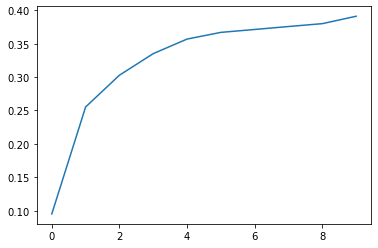

In [145]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);